### Decision Tree Classification: CART

1. Exploratory Data Analysis (Keşifçi Veri Analizi)
2. Data Preprocessing & Feature Engineering (Veri Önişleme & Özellik Mühendisliği)
3. Modeling using CART (CART Modelleme)
4. Hyperparameter Optimization with GridSearchCV (GridSearchCV ile Hyperparametre Optimizasyonu)
5. Final Model (Final Modeli)
6. Feature Importance (Değişkenlerin Önemini Belirleme)
7. Analuzing Model Complexity with Learning Curves (BONUS) (Öğrenme Eğrileriyle Model Karmaşıklığını Analiz Etme)
8. Visualizing the Decision Tree (Karar Ağacını Görselleştirme)
9. Extrating Desicion Rules (Karar Kurallarını Çıkarma)
10. Extracting Python/SQL/Excel Codes of Decision Rules (Karar Kurallarının Python/SQL/Excel Kodlarını Çıkarma)
11. Prediction using Python Codes (Python Kodlarıyla Tahmin)
12. Saving and Loading Model (Modeli Kaydetme ve Yükleme)

In [4]:
# Kütüphaneler

import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,validation_curve
from skompiler import skompile

In [5]:
# Pandas ayarları
pd.set_option('display.max_columns', None)

# Warnings ayarları
warnings.simplefilter(action='ignore', category=Warning)

#### 1. Exploratory Data Analysis (Keşifçi Veri Analizi)

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### 2. Data Preprocessing & Feature Engineering (Veri Önişleme & Özellik Mühendisliği)


In [11]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

#### 3. Modeling using CART (CART Modelleme)


In [12]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

In [13]:
# Confusion Matrix için y_pred
y_pred = cart_model.predict(X)

In [14]:
# AUC için y_prob
y_prob = cart_model.predict_proba(X)[:, 1]

In [15]:
print(classification_report(y, y_pred))

# Accuracy = %100, çok kritik...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [16]:
# AUC
roc_auc_score(y, y_prob)
# 1.0

1.0

In [17]:
# Gerçekten modelim bu kadar başarılımı?
# sorusunun cevabı: Model Valudeation (Model Doğrulama)

################################
# Holdout Yöntemi ile Başarı Değerlendirme
################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [18]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [19]:
# Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [20]:
#  Train Hatası'da bir geldi yani modelim eğitim setine göre %100 başarılı. =D

# Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       150
           1       0.57      0.58      0.57        81

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



0.6701234567901234

In [ ]:
# MODEL OVERFIT olmuş... MODEL ezber yapmış.

In [22]:
# Birde kesin emin olmak için CV yapalım.


################################
# CV ile Başarı Değerlendirme
################################

cart_model = DecisionTreeClassifier(random_state=17).fit(X, y) # CV yapacağım için fit etmesekte olur cross_validate görmezden gelecek.

In [23]:
cv_results = cross_validate(cart_model, X, y, cv=10, scoring=["accuracy","f1","roc_auc"])

In [24]:
cv_results["test_accuracy"].mean()

0.7148496240601504

In [ ]:
# 0.7148

In [25]:
cv_results["test_f1"].mean()

0.5780669232692448

In [26]:
# 0.5780

In [27]:
cv_results["test_roc_auc"].mean()

0.6796239316239316

In [28]:
# 0.6796

#### 4. Hyperparameter Optimization with GridSearchCV (GridSearchCV ile Hyperparametre Optimizasyonu)


In [29]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [30]:
# Parametre sözlüğü oluşturalım.

cart_params = {"max_depth": range(1,11),
               "min_samples_split": range(2,20)}

In [31]:
cart_best_grid = GridSearchCV(cart_model,
                             cart_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=True).fit(X,y) # scorring=["accuracy","f1","roc_auc"] değerlerinden birini kullanabiliriz.

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [32]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [33]:
cart_best_grid.best_score_

0.7500806383159324

In [34]:
# Aslında cart_best_grid içerisinde final model vardır ama bazı engellerden dolayı final modelin tekrar kurulması gerekebilir.

random = X.sample(1,random_state=45)

cart_best_grid.predict(random)

array([1], dtype=int64)

#### 5. Final Model (Final Modeli)


In [35]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X,y)

In [36]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
# Eski modeli yeni parametrelerle fit etmek istersem:
# cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)

In [38]:
cv_results = cross_validate(cart_final, X, y, cv=5, scoring=["accuracy","f1","roc_auc"])

In [39]:
cv_results["test_accuracy"].mean()

0.7500806383159324

In [40]:
# 0.7500

In [41]:
cv_results["test_f1"].mean()

0.614625004082526

In [42]:
# 0.6146

In [43]:
cv_results["test_roc_auc"].mean()

0.797796645702306

In [44]:
# 0.7977

#### 6. Feature Importance (Değişkenlerin Önemini Belirleme)


In [46]:
# feature_importances_ ile önemi görebiliriz ama anlayacağımız şekilde değildir.

cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

In [47]:
# Bunu anlamak için bir fonksiyon kullanabilriz.

def plot_importance(model,features,num=len(X),save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,"Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig("importances.png")

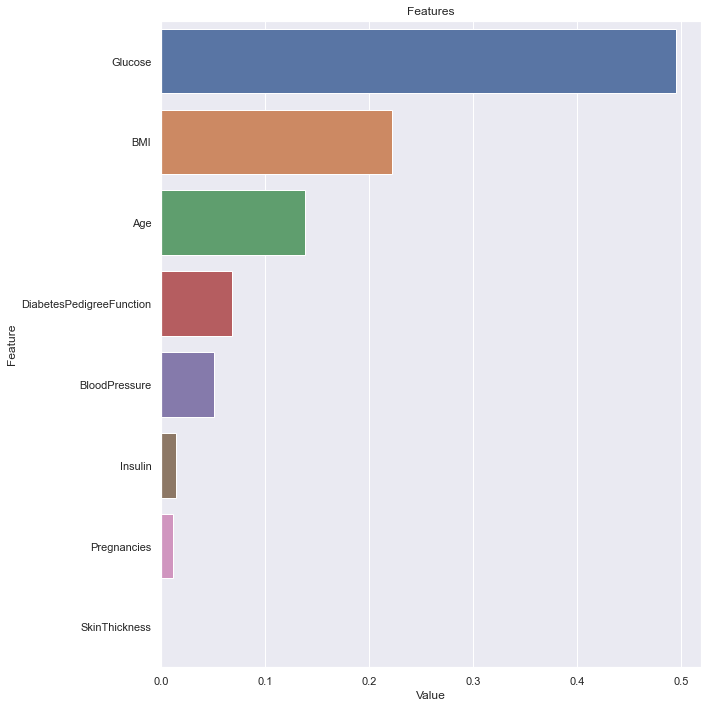

In [49]:
plot_importance(cart_final,X)

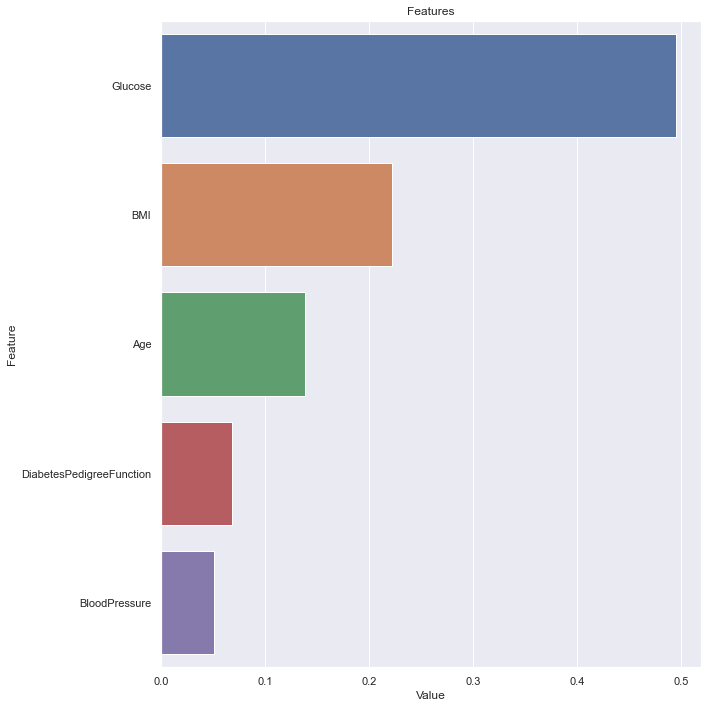

In [50]:
plot_importance(cart_final,X,num=5)

#### 7. Analuzing Model Complexity with Learning Curves (BONUS) (Öğrenme Eğrileriyle Model Karmaşıklığını Analiz Etme)


In [51]:
train_score, test_score = validation_curve(cart_final, X, y, param_name="max_depth", param_range=range(1,11),scoring="roc_auc", cv=10)

In [52]:
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

In [53]:
mean_train_score

array([0.70729413, 0.78976751, 0.83642714, 0.87603684, 0.90819184,
       0.93528351, 0.96013549, 0.97716774, 0.98781586, 0.99359846])

In [54]:
mean_test_score

array([0.68127066, 0.74061681, 0.77597863, 0.77651852, 0.77109259,
       0.76239744, 0.74034473, 0.7137265 , 0.69966524, 0.69232051])

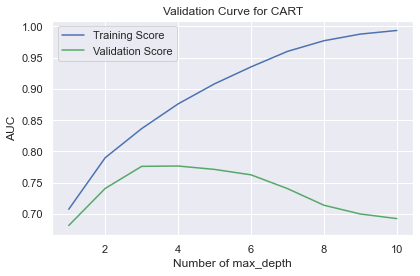

In [55]:
plt.plot(range(1,11),mean_train_score,label="Training Score",color="b")

plt.plot(range(1,11),mean_test_score,label="Validation Score",color="g")

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [64]:
def val_curve_params(model,X,y,param_name,param_range,scoring="roc_auc",cv=10):
    train_score, test_score = validation_curve(model, X=X, y=y, param_name=param_name, param_range=param_range,scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,label="Training Score", color="b")
    plt.plot(param_range, mean_test_score,label="Validation Score", color="g")

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show(block=True)

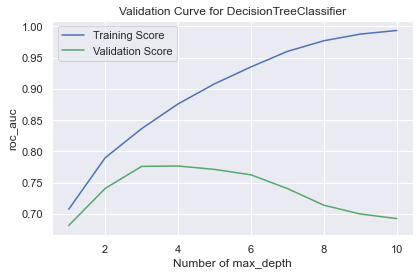

In [57]:
val_curve_params(cart_final,X,y,"max_depth",range(1,11))

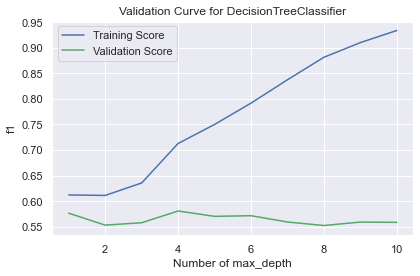

In [60]:
val_curve_params(cart_final,X,y,"max_depth",scoring="f1",param_range=range(1,11))

In [62]:
# Birden fazla değişken değerlendirmesi:

cart_val_params = [["max_depth",range(1,11)],["min_samples_split",range(2,20)]]

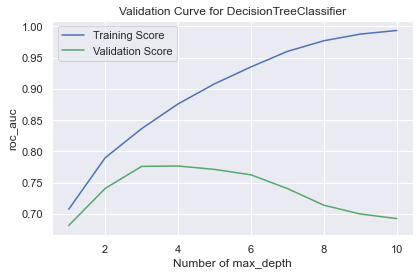

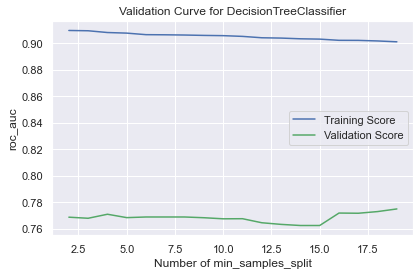

In [65]:
for i in range(len(cart_val_params)):
    val_curve_params(cart_final,X,y,cart_val_params[i][0],cart_val_params[i][1])

#### 8. Visualizing the Decision Tree (Karar Ağacını Görselleştirme)


In [66]:
import graphviz

In [73]:
def tree_graph(model,col_names,file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [ ]:
tree_graph(model=cart_final,col_names=X.columns,file_name="cart_final.png")

#### 9. Extrating Desicion Rules (Karar Kurallarını Çıkarma)


In [75]:
tree_rules = export_text(cart_final, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

#### 10. Extracting Python/SQL/Excel Codes of Decision Rules (Karar Kurallarının Python/SQL/Excel Kodlarını Çıkarma)


In [76]:
print(skompile(cart_final.predict).to("python/code"))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



In [78]:
print(skompile(cart_final.predict).to("sqlalchemy/sqlite"))

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x3 <= 99.0) THEN 1 ELSE 0 END END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


In [79]:
print(skompile(cart_final.predict).to("excel"))

A1=IF((x2<=127.5),IF((x ...418 chars skipped... ((x5<=629.5),1,0))))


#### 11. Prediction using Python Codes (Python Kodlarıyla Tahmin)


In [80]:
def predict_with_rules(x):
    return (((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )

In [81]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [82]:
x = [12,13,20,23,4,55,12,7]

In [83]:
predict_with_rules(x)

1

In [94]:
x = [6,148,70,35,0,30,0.62,20]

In [95]:
predict_with_rules(x)

0

#### 12. Saving and Loading Model (Modeli Kaydetme ve Yükleme)

In [97]:
joblib.dump(cart_final, "cart_final.pkl")

['cart_final.pkl']

In [98]:
cart_model_from_disc = joblib.load("cart_final.pkl")

In [101]:
x = [12,13,20,23,4,55,12,7]

cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1], dtype=int64)